## Data Processing with Pandas
data cleansing

In [1]:
import numpy as np
import pandas as pd

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv")
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
#12 pada own_occupied adalah unknown values karna beda sendiri
#yang ada na dan -- itu perlu diubah ke missing values
# ada 9 baris , di num_bedrooms terdapat kesalahan yaitu harusnya ada 4 tp totalnya 3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [5]:
df["ST_NUM"]

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [6]:
# untuk mengetahui nilai null
df["ST_NUM"].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [8]:
# totalin semua nilai True
df["ST_NUM"].isnull().sum()

2

In [9]:
df["ST_NUM"].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [10]:
df["NUM_BEDROOMS"].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [14]:
# mengubah index 7 dan 8 menjadi missing values (alternative)
#df.loc[7:,"NUM_BEDROOMS"] = np.nan
#df["NUM_BEDROOMS"]

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: object

In [40]:
#kalau misalkan banyak datanya maka perlu na_values untuk detect semua nan
df =pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv",
           na_values=["n/a","na", "","--"])
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  5 non-null      float64
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [42]:
df["OWN_OCCUPIED"].isna()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [43]:
#categorial
df["OWN_OCCUPIED"].unique()

array(['Y', 'N', '12', nan], dtype=object)

In [44]:
df["OWN_OCCUPIED"].value_counts()

Y     5
N     2
12    1
Name: OWN_OCCUPIED, dtype: int64

In [45]:
df.loc[0,"OWN_OCCUPIED"]

'Y'

In [46]:
#looping, klo dia string dan bisa di convert ke int, klo bisa itu missing values
# sedangkan klo str nya bisa konversi ke int maka biarin aja
# ternyata klo bukan string maka dibiarin aja
for row in df.OWN_OCCUPIED:
    print(row, type(row))

Y <class 'str'>
N <class 'str'>
N <class 'str'>
12 <class 'str'>
Y <class 'str'>
Y <class 'str'>
nan <class 'float'>
Y <class 'str'>
Y <class 'str'>


In [47]:
for row in df.OWN_OCCUPIED:
    print(isinstance(row, str))

True
True
True
True
True
True
False
True
True


In [48]:
# KLO GA BISA DI KONVERSI KE INT DIBIARIN AJA
# KLO DIA BISA MAKA HARUS DI HANDLE
for row in df.OWN_OCCUPIED:
    if not isinstance(row, str):
        continue
    try:
        print(int(row))
        print("tidak error")
    except:
        print(row,"tidak bisa jadi int")
    

Y tidak bisa jadi int
N tidak bisa jadi int
N tidak bisa jadi int
12
tidak error
Y tidak bisa jadi int
Y tidak bisa jadi int
Y tidak bisa jadi int
Y tidak bisa jadi int


In [52]:
for idx, row in enumerate(df.OWN_OCCUPIED):
    if not isinstance(row, str):
        continue
    try:
        int(row)
        df.loc[idx, "OWN_OCCUPIED"] = np.nan #index nya mesti tau
    except:
        print(row,"tidak bisa jadi int")
df.OWN_OCCUPIED

Y tidak bisa jadi int
N tidak bisa jadi int
N tidak bisa jadi int
Y tidak bisa jadi int
Y tidak bisa jadi int
Y tidak bisa jadi int
Y tidak bisa jadi int


0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [49]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [53]:
df.NUM_BATH[0] # klo ada petik itu str

1

In [55]:
# NUM_BATH 
# KLO GA BISA CONVERT KE INT ALIAS ERROR MESTI DI UBAH
for idx, row in enumerate(df.NUM_BATH):
    if not isinstance(row, str):
        continue
    try:
        int(row)
        df.loc[idx, "NUM_BATH"] = int(float(row)) #index nya mesti tau
    except:
        df.loc[idx, "NUM_BATH"] = np.nan
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [37]:
df.NUM_BATH[0]  #jadi int

1

In [38]:
#int("1.5")  bakal error maka dikasih missing values
float("1.5") 

1.5

In [39]:
int(float("1.5"))

1

In [57]:
df.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        3
SQ_FT           2
dtype: int64

In [59]:
(df.isna().sum() / df.shape[0]) * 100

PID             11.111111
ST_NUM          22.222222
ST_NAME          0.000000
OWN_OCCUPIED    22.222222
NUM_BEDROOMS    44.444444
NUM_BATH        33.333333
SQ_FT           22.222222
dtype: float64

In [61]:
# isi missing value terhadap statistic
df["ST_NUM"].fillna(125) # belum update datanya

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [62]:
# buat default update aja
#df["ST_NUM"] = df["ST_NUM"].fillna(125)
df["ST_NUM"].fillna(125, inplace = True)

In [63]:
df["ST_NUM"]

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [65]:
# dalam bentuk categorical maka ga bisa langsung masukkin statistic
# klo gitu ambil nilai modus nya misalnya Y yang paling sering muncul
df["OWN_OCCUPIED"].mode()

0    Y
dtype: object

In [66]:
df["OWN_OCCUPIED"].mode().values[0]

'Y'

In [69]:
df["OWN_OCCUPIED"].mode().values[0], df["OWN_OCCUPIED"].mode().item()

('Y', 'Y')

In [72]:
df["OWN_OCCUPIED"].fillna(df["OWN_OCCUPIED"].mode().values[0],inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,Y,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [75]:
int(df["NUM_BATH"].astype("float").mean())

1

In [77]:
df["NUM_BEDROOMS"].fillna(df["NUM_BEDROOMS"].median(), inplace=True)
df["NUM_BATH"].fillna(int(df["NUM_BATH"].astype("float").mean()), inplace=True)
df["SQ_FT"].fillna(df["SQ_FT"].mean(), inplace =True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        9 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  9 non-null      object 
 4   NUM_BEDROOMS  9 non-null      float64
 5   NUM_BATH      9 non-null      int64  
 6   SQ_FT         9 non-null      float64
dtypes: float64(4), int64(1), object(2)
memory usage: 632.0+ bytes


In [78]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1,1100.0
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,1,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,Y,2.0,1,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,1100.0
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [ ]:
#klo data mising valuenya banyak maka bisa dropna (hilangin kolom atau barisnya)
# misalnya axis 0 di PID banyak missing value maka nanti dia bakal drop

In [87]:
data = pd.ExcelFile("D:\Kuliah Bebe\hacktiv8\obes.xls")
data

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [ ]:
data.sheet_names

In [ ]:
data_age = data.parse("7.2", skiprows=4, skupfooter = 14)

In [ ]:
data_age.rename(columns= {"Unnamed:0": "Year"}, inplace = True)

In [ ]:
data_age.dropna(inplace=True)

## DATASET 3

In [106]:
df= pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv")
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [90]:
df.shape

(4383, 5)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [92]:
import datetime

In [107]:
pd.to_datetime(df.Date, yearfirst = True)

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
4378   2017-12-27
4379   2017-12-28
4380   2017-12-29
4381   2017-12-30
4382   2017-12-31
Name: Date, Length: 4383, dtype: datetime64[ns]

In [95]:
pd.to_datetime(df.Date, dayfirst = True).dt.day

0        1
1        2
2        3
3        4
4        5
        ..
4378    27
4379    28
4380    29
4381    30
4382    31
Name: Date, Length: 4383, dtype: int64

In [96]:
pd.to_datetime(df.Date)

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
4378   2017-12-27
4379   2017-12-28
4380   2017-12-29
4381   2017-12-30
4382   2017-12-31
Name: Date, Length: 4383, dtype: datetime64[ns]

In [108]:
df["Date"] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [109]:
df.set_index("Date", inplace = True)
df.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
2006-01-06,1403.427,NaN,NaN,NaN
2006-01-07,1300.287,NaN,NaN,NaN
2006-01-08,1207.985,NaN,NaN,NaN
2006-01-09,1529.323,NaN,NaN,NaN


In [112]:
df.index.year.unique(), df.index.year.value_counts()

(Int64Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
             2017],
            dtype='int64', name='Date'),
 2008    366
 2012    366
 2016    366
 2009    365
 2013    365
 2017    365
 2006    365
 2010    365
 2014    365
 2007    365
 2011    365
 2015    365
 Name: Date, dtype: int64)

In [113]:
df[df.index.month == 1]

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
...,...,...,...,...
2017-01-27,1629.164,254.270,68.625,322.895
2017-01-28,1394.033,208.827,65.964,274.791
2017-01-29,1296.170,304.952,53.854,358.806


In [114]:
df["Year"] = df.index.year 
df["Month"] = df.index.month
df["Weekday"] = df.index.weekday
df

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


In [115]:
df[df.Year == 2016]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2016-01-01,1060.366,107.209,18.563,125.772,2016,1,4
2016-01-02,1192.698,409.622,9.406,419.028,2016,1,5
2016-01-03,1179.282,406.296,13.519,419.815,2016,1,6
2016-01-04,1456.294,278.460,10.080,288.540,2016,1,0
2016-01-05,1506.737,206.468,12.549,219.017,2016,1,1
...,...,...,...,...,...,...,...
2016-12-27,1289.324,640.895,23.448,664.343,2016,12,1
2016-12-28,1294.881,214.990,19.450,234.440,2016,12,2
2016-12-29,1295.897,167.698,42.910,210.608,2016,12,3


In [116]:
df[df.Month == 1]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-01-27,1629.164,254.270,68.625,322.895,2017,1,4
2017-01-28,1394.033,208.827,65.964,274.791,2017,1,5
2017-01-29,1296.170,304.952,53.854,358.806,2017,1,6


In [117]:
list_columns = ["Consumption", "Wind", "Solar", "Wind+Solar"]
daily_average_opsd = df[list_columns].resample("D").mean()
weekly_average_opsd = df[list_columns].resample("W").mean()
monthly_average_opsd = df[list_columns].resample("M").mean()
daily_average_opsd

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [118]:
weekly_average_opsd

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


In [119]:
monthly_average_opsd

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,1461.442065,NaN,NaN,NaN
2006-02-28,1467.106893,NaN,NaN,NaN
2006-03-31,1418.649161,NaN,NaN,NaN
2006-04-30,1275.058900,NaN,NaN,NaN
2006-05-31,1253.488484,NaN,NaN,NaN
...,...,...,...,...
2017-08-31,1291.283022,177.412839,148.477677,325.890516
2017-09-30,1335.952031,209.591000,102.643033,312.234033
2017-10-31,1366.297385,402.583774,68.727645,471.311419


<AxesSubplot:xlabel='Date'>

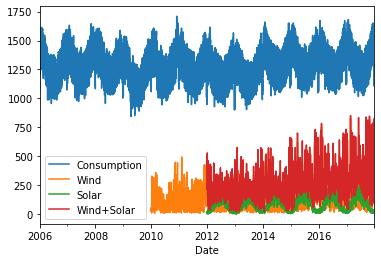

In [120]:
daily_average_opsd.plot()
# dari 2010 belum ada wind+solar 
# dari 2012 baru ada wind+solar

In [121]:
daily_average_opsd.to_csv("data/daily_average_opsd.csv").index =True

AttributeError: 'NoneType' object has no attribute 'index'